In [1]:
##data from: https://ssd.jpl.nasa.gov/tools/sbdb_query.html#!#results
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
new_df = pd.read_csv("sbdb_query_results (1).csv")

In [3]:
new_df.head()

,full_name,a,e,i,om,w,q,ad,per_y,data_arc,...,IR,spec_B,spec_T,pha,n,ma,tp,spkid,pdes,name
0,433 Eros (A898 PA),1.458,0.2228,10.83,304.29,178.93,1.133,1.78,1.76,46582.0,...,NaN,S,S,N,0.5598,110.78,2459802.60,20000433,433,Eros
1,719 Albert (A911 TB),2.637,0.5470,11.58,183.86,156.25,1.195,4.08,4.28,40483.0,...,NaN,S,NaN,N,0.2301,10.24,2459956.02,20000719,719,Albert
2,887 Alinda (A918 AA),2.472,0.5707,9.40,110.42,350.48,1.061,3.88,3.89,38459.0,...,NaN,NaN,S,N,0.2535,188.04,2460678.79,20000887,887,Alinda
3,1036 Ganymed (A924 UB),2.666,0.5330,26.69,215.50,132.47,1.245,4.09,4.35,36005.0,...,NaN,S,S,N,0.2264,231.16,2460569.53,20001036,1036,Ganymed
4,1221 Amor (1932 EA1),1.919,0.4358,11.88,171.32,26.63,1.083,2.76,2.66,32775.0,...,NaN,NaN,NaN,N,0.3708,49.38,2459867.32,20001221,1221,Amor


In [4]:
new_df["pha"].value_counts()

N    29753
Y     2339
Name: pha, dtype: int64

In [6]:
missing_percentages = new_df.isna().mean()
for i in new_df.columns:
    print(i, missing_percentages[i])

full_name 0.0
a 0.0
e 0.0
i 0.0
om 0.0
w 0.0
q 0.0
ad 0.0
per_y 0.0
data_arc 0.008188299760266509
condition_code 3.1134219620785205e-05
n_obs_used 0.0
n_del_obs_used 0.968834646159594
n_dop_obs_used 0.968834646159594
H 0.00018680531772471122
diameter 0.9611444939132601
extent 0.9996575235841714
albedo 0.9625455337961955
rot_per 0.9337775148665899
GM 0.9998443289018961
BV 0.9988168996544101
UB 0.9988168996544101
IR 0.9999688657803792
spec_B 0.9902549892586943
spec_T 0.9988791680936517
pha 0.0008406239297612005
n 0.0
ma 0.0
tp 0.0
spkid 0.0
pdes 0.0
name 0.9948317195429497


In [7]:
new_df = new_df.drop(new_df.columns[[12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 31]], axis=1)

In [8]:
new_df["pha"] = pd.get_dummies(new_df["pha"], drop_first=True)

In [9]:
new_df = new_df.rename({"a":"semi-major axis (au)",
              "e":"eccentricity",
              "i":"inclination (deg)",
              "om":"node (deg)",
              "w":"perihelion arg (deg)",
              "q":"perihelion distance (au)",
              "ad":"aphelion distance (au)",
              "tp":"time perihelion passage (tdb)",
              "H":"absolute magnitude",
              "ma":"mean anomaly"}, axis=1)

In [10]:
new_df.head()

,full_name,semi-major axis (au),eccentricity,inclination (deg),node (deg),perihelion arg (deg),perihelion distance (au),aphelion distance (au),per_y,data_arc,condition_code,n_obs_used,absolute magnitude,pha,n,mean anomaly,time perihelion passage (tdb),spkid,pdes
0,433 Eros (A898 PA),1.458,0.2228,10.83,304.29,178.93,1.133,1.78,1.76,46582.0,0.0,9130,10.31,0,0.5598,110.78,2459802.60,20000433,433
1,719 Albert (A911 TB),2.637,0.5470,11.58,183.86,156.25,1.195,4.08,4.28,40483.0,0.0,2035,15.59,0,0.2301,10.24,2459956.02,20000719,719
2,887 Alinda (A918 AA),2.472,0.5707,9.40,110.42,350.48,1.061,3.88,3.89,38459.0,0.0,3025,13.83,0,0.2535,188.04,2460678.79,20000887,887
3,1036 Ganymed (A924 UB),2.666,0.5330,26.69,215.50,132.47,1.245,4.09,4.35,36005.0,0.0,9680,9.22,0,0.2264,231.16,2460569.53,20001036,1036
4,1221 Amor (1932 EA1),1.919,0.4358,11.88,171.32,26.63,1.083,2.76,2.66,32775.0,0.0,585,17.38,0,0.3708,49.38,2459867.32,20001221,1221


In [11]:
new_df["pha"] = pd.get_dummies(new_df["pha"], drop_first = True)

In [12]:
new_df.head()

,full_name,semi-major axis (au),eccentricity,inclination (deg),node (deg),perihelion arg (deg),perihelion distance (au),aphelion distance (au),per_y,data_arc,condition_code,n_obs_used,absolute magnitude,pha,n,mean anomaly,time perihelion passage (tdb),spkid,pdes
0,433 Eros (A898 PA),1.458,0.2228,10.83,304.29,178.93,1.133,1.78,1.76,46582.0,0.0,9130,10.31,0,0.5598,110.78,2459802.60,20000433,433
1,719 Albert (A911 TB),2.637,0.5470,11.58,183.86,156.25,1.195,4.08,4.28,40483.0,0.0,2035,15.59,0,0.2301,10.24,2459956.02,20000719,719
2,887 Alinda (A918 AA),2.472,0.5707,9.40,110.42,350.48,1.061,3.88,3.89,38459.0,0.0,3025,13.83,0,0.2535,188.04,2460678.79,20000887,887
3,1036 Ganymed (A924 UB),2.666,0.5330,26.69,215.50,132.47,1.245,4.09,4.35,36005.0,0.0,9680,9.22,0,0.2264,231.16,2460569.53,20001036,1036
4,1221 Amor (1932 EA1),1.919,0.4358,11.88,171.32,26.63,1.083,2.76,2.66,32775.0,0.0,585,17.38,0,0.3708,49.38,2459867.32,20001221,1221


In [13]:
new_df["pha_"] = new_df["pha"]
new_df=new_df.drop("pha", axis=1)

In [14]:
new_df.head()

,full_name,semi-major axis (au),eccentricity,inclination (deg),node (deg),perihelion arg (deg),perihelion distance (au),aphelion distance (au),per_y,data_arc,condition_code,n_obs_used,absolute magnitude,n,mean anomaly,time perihelion passage (tdb),spkid,pdes,pha_
0,433 Eros (A898 PA),1.458,0.2228,10.83,304.29,178.93,1.133,1.78,1.76,46582.0,0.0,9130,10.31,0.5598,110.78,2459802.60,20000433,433,0
1,719 Albert (A911 TB),2.637,0.5470,11.58,183.86,156.25,1.195,4.08,4.28,40483.0,0.0,2035,15.59,0.2301,10.24,2459956.02,20000719,719,0
2,887 Alinda (A918 AA),2.472,0.5707,9.40,110.42,350.48,1.061,3.88,3.89,38459.0,0.0,3025,13.83,0.2535,188.04,2460678.79,20000887,887,0
3,1036 Ganymed (A924 UB),2.666,0.5330,26.69,215.50,132.47,1.245,4.09,4.35,36005.0,0.0,9680,9.22,0.2264,231.16,2460569.53,20001036,1036,0
4,1221 Amor (1932 EA1),1.919,0.4358,11.88,171.32,26.63,1.083,2.76,2.66,32775.0,0.0,585,17.38,0.3708,49.38,2459867.32,20001221,1221,0


In [15]:
new_df = new_df.dropna()

<AxesSubplot: >

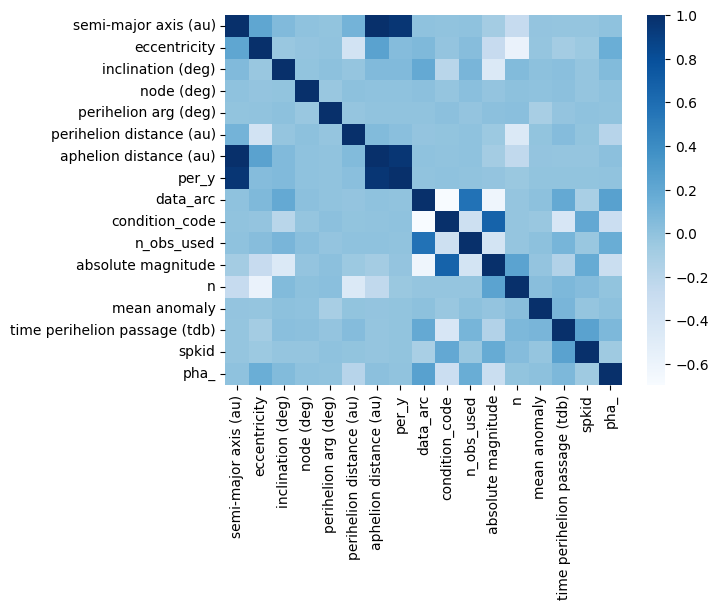

In [16]:
sns.heatmap(new_df.corr(), cmap = "Blues")

<AxesSubplot: >

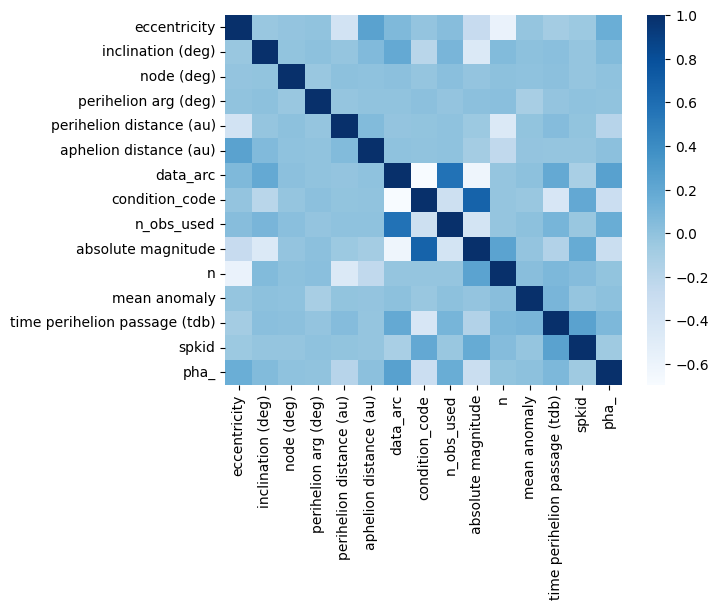

In [17]:
new_df = new_df.drop(["per_y", "semi-major axis (au)"], axis=1)
sns.heatmap(new_df.corr(), cmap = "Blues")

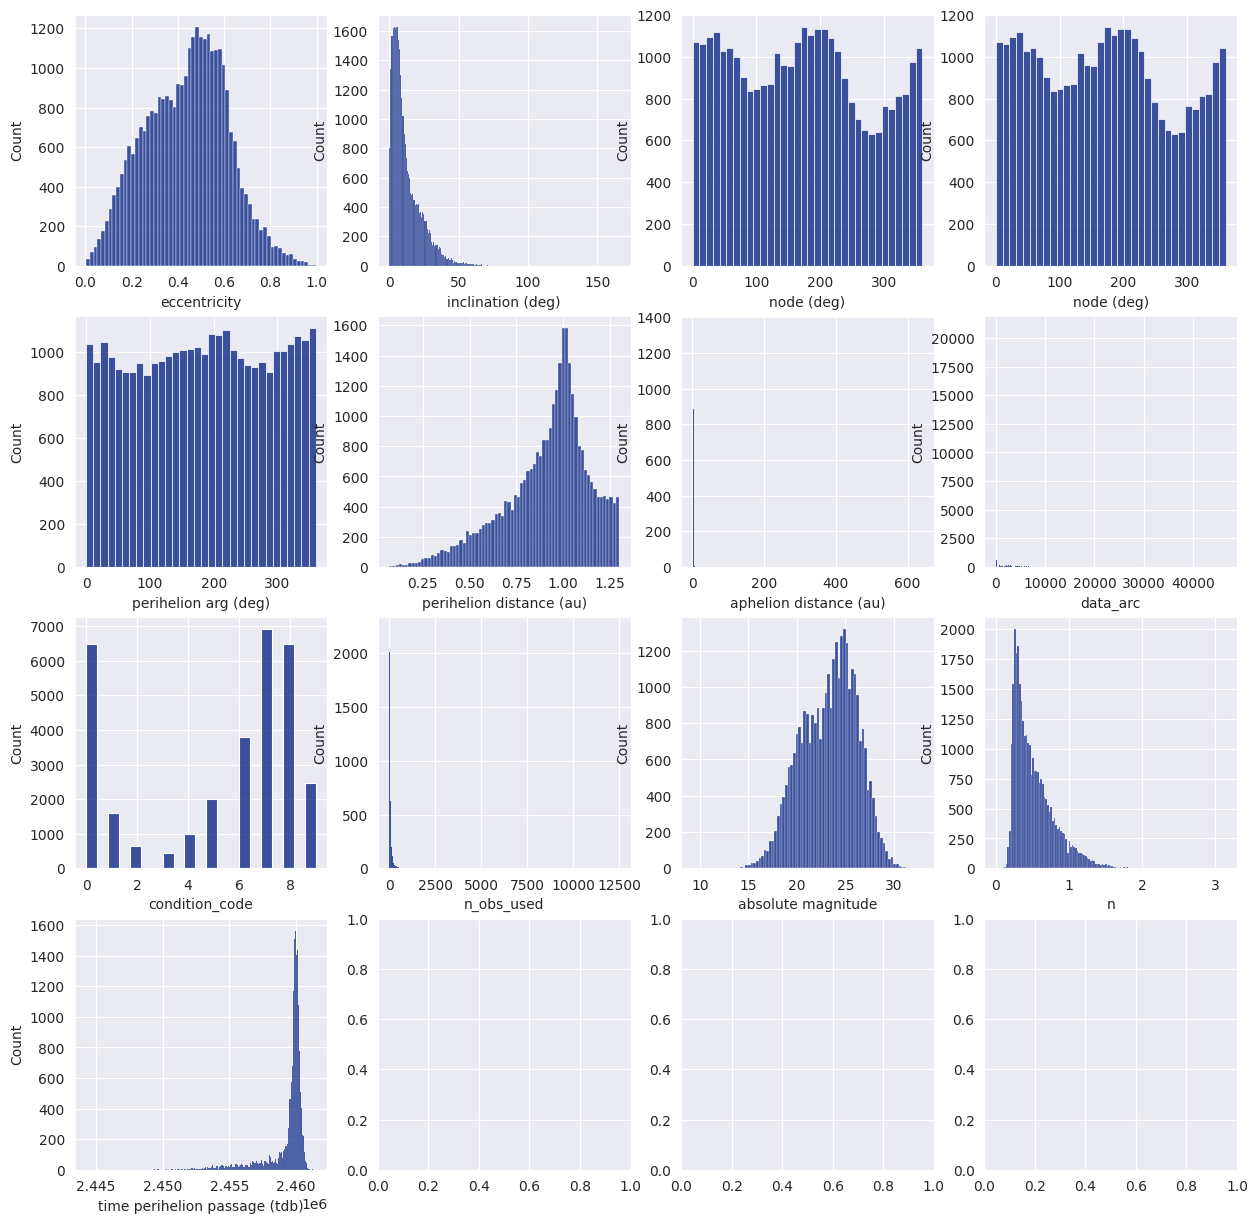

In [18]:
sns.set_style("darkgrid")
sns.set_palette("dark")
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15,15))

sns.histplot(data=new_df, x="eccentricity", ax=axs[0, 0])
sns.histplot(data=new_df, x="inclination (deg)", ax=axs[0, 1])
sns.histplot(data=new_df, x="node (deg)", ax=axs[0, 2])
sns.histplot(data=new_df, x="node (deg)", ax=axs[0, 3])
sns.histplot(data=new_df, x="perihelion arg (deg)", ax=axs[1, 0])
sns.histplot(data=new_df, x="perihelion distance (au)", ax=axs[1, 1])
sns.histplot(data=new_df, x="aphelion distance (au)", ax=axs[1, 2])
sns.histplot(data=new_df, x="data_arc", ax=axs[1, 3])
sns.histplot(data=new_df, x="condition_code", ax=axs[2, 0])
sns.histplot(data=new_df, x="n_obs_used", ax=axs[2, 1])
sns.histplot(data=new_df, x="absolute magnitude", ax=axs[2, 2])
sns.histplot(data=new_df, x="n", ax=axs[2, 3])
sns.histplot(data=new_df, x="time perihelion passage (tdb)", ax=axs[3, 0])

plt.show()

In [19]:
asteroids = new_df.to_csv("\\wsl.localhost\\Ubuntu\\home\\ealcott\\summer_projects_2023\\nasa_asteroids_\\asteroids.csv",
                         index = False)